In [3]:
import cv2
import mediapipe as mp
import numpy as np
import os
import pandas as pd
from PIL import Image
import pandas as pd
# Import the required libraries.
import os
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt
 
%matplotlib inline
 
from sklearn.model_selection import train_test_split
 
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

2023-03-24 21:31:04.242697: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-24 21:31:05.015250: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/nhamcotdo/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-03-24 21:31:05.015268: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-24 21:31:06.989625: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dl

In [4]:
# Kích thướng mỗi frame
IMAGE_HEIGHT , IMAGE_WIDTH = 320, 240
# số lượng frame sẽ lấy ở mỗi video
SEQUENCE_LENGTH = 20
# Những hành động sẽ nhận dạng
CLASSES_LIST = ['Your', 'Love', 'Sleep', 'Name',
                'What', 'Read', 'I', 'Bye', 'You', 'Eat', 'Hello']

# Link thư mục chứa video train
DATASET_DIR = 'PhanLoai'


In [5]:
dataset = np.load('./dataset.npz')

In [6]:
features=dataset['features']
labels=dataset['labels']
video_files_paths=dataset['video_files_paths']

In [7]:
features.shape

(94, 20, 240, 320, 3)

In [8]:
one_hot_encoded_labels = to_categorical(labels)

In [9]:
seed_constant = 27
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

In [10]:
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels, test_size = 0.25, shuffle = True, random_state = seed_constant)

In [11]:
def create_convlstm_model():
    '''
    This function will construct the required convlstm model.
    Returns:
        model: It is the required constructed convlstm model.
    '''
 
    # We will use a Sequential model for model construction
    model = Sequential()
 
    # Define the Model Architecture.
    ########################################################################################################################
    
    model.add(ConvLSTM2D(filters = 4, kernel_size = (3, 3), activation = 'tanh',data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True, input_shape = (SEQUENCE_LENGTH,
                                                                                      IMAGE_WIDTH, IMAGE_HEIGHT, 3)))
    
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    model.add(TimeDistributed(Dropout(0.2)))
    
    model.add(ConvLSTM2D(filters = 8, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True))
    
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    model.add(TimeDistributed(Dropout(0.2)))
    
    model.add(ConvLSTM2D(filters = 14, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True))
    
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    model.add(TimeDistributed(Dropout(0.2)))
    
    model.add(ConvLSTM2D(filters = 16, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True))
    
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    model.add(TimeDistributed(Dropout(0.2)))
    
    model.add(Flatten()) 
    
    model.add(Dense(len(CLASSES_LIST), activation = "softmax"))
    
    ########################################################################################################################
     
    # Display the models summary.
    model.summary()
    
    # Return the constructed convlstm model.
    return model

In [12]:
# Construct the required convlstm model.
convlstm_model = create_convlstm_model()
 
# Display the success message. 
print("Model Created Successfully!")

2023-03-24 21:32:05.360766: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/nhamcotdo/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-03-24 21:32:05.363332: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-24 21:32:05.363554: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nhamcotdo): /proc/driver/nvidia/version does not exist
2023-03-24 21:32:05.367611: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate com

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d (ConvLSTM2D)    (None, 20, 238, 318, 4)   1024      
                                                                 
 max_pooling3d (MaxPooling3D  (None, 20, 119, 159, 4)  0         
 )                                                               
                                                                 
 time_distributed (TimeDistr  (None, 20, 119, 159, 4)  0         
 ibuted)                                                         
                                                                 
 conv_lstm2d_1 (ConvLSTM2D)  (None, 20, 117, 157, 8)   3488      
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 20, 59, 79, 8)    0         
 3D)                                                             
                                                        

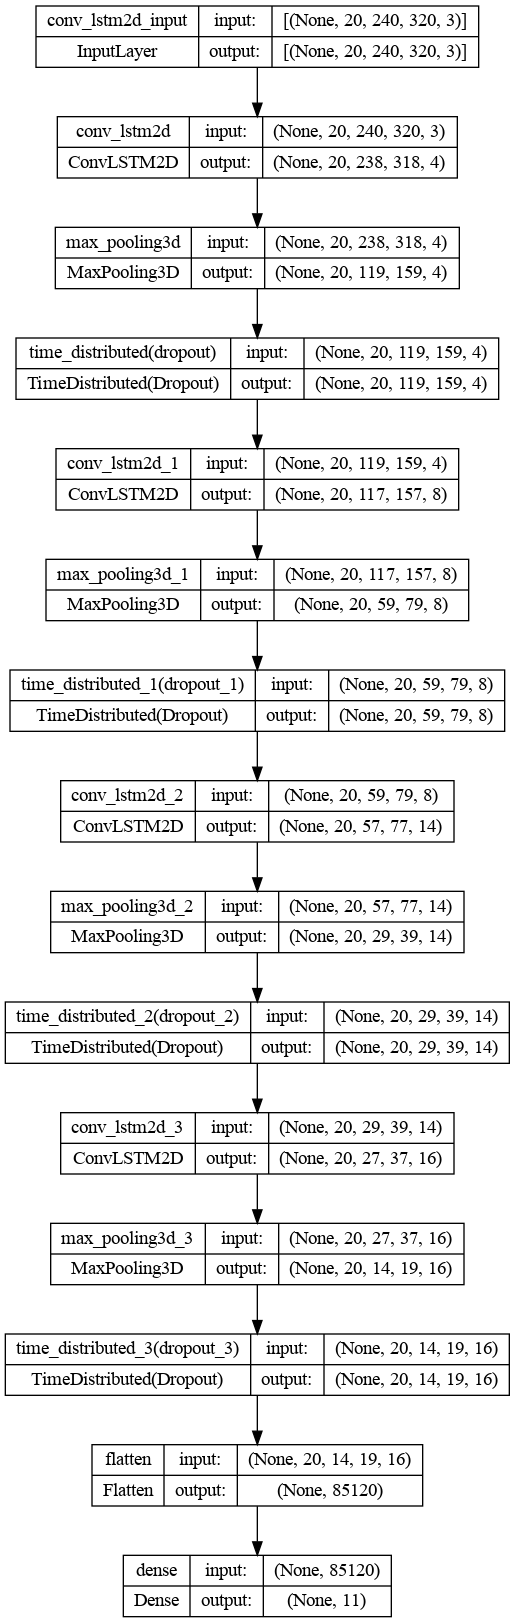

In [13]:
plot_model(convlstm_model, to_file = 'convlstm_model_structure_plot.png', show_shapes = True, show_layer_names = True)

In [22]:
# !pip install pydot

In [14]:
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', restore_best_weights = True)
 
# Compile the model and specify loss function, optimizer and metrics values to the model
convlstm_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])
 
# Start training the model.
# convlstm_model_training_history = convlstm_model.fit(x = features_train, y = labels_train, epochs = 50, batch_size = 1,shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback])

In [24]:
 	
# Evaluate the trained model.
# model_evaluation_history = convlstm_model.evaluate(features_test, labels_test)

In [18]:
# model_evaluation_loss, model_evaluation_accuracy = model_evaluation_history
 
# # Define the string date format.
# # Get the current Date and Time in a DateTime Object.
# # Convert the DateTime object to string according to the style mentioned in date_time_format string.
# date_time_format = '%Y_%m_%d__%H_%M_%S'
# current_date_time_dt = dt.datetime.now()
# current_date_time_string = dt.datetime.strftime(current_date_time_dt, date_time_format)
 
# # Define a useful name for our model to make it easy for us while navigating through multiple saved models.
# model_file_name = f'convlstm_model___Date_Time_{current_date_time_string}___Loss_{model_evaluation_loss}___Accuracy_{model_evaluation_accuracy}.h5'
 
# # Save your Model.
# convlstm_model.save(model_file_name)

In [15]:
convlstm_model.load_weights('./convlstm_model___Date_Time_2023_03_22__01_55_16___Loss_6.049234390258789___Accuracy_0.25.h5')
model_evaluation_history = convlstm_model.evaluate(features_test, labels_test)

2023-03-24 21:33:18.106350: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 442368000 exceeds 10% of free system memory.
2023-03-24 21:33:20.297446: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 442368000 exceeds 10% of free system memory.
2023-03-24 21:33:20.607407: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 442368000 exceeds 10% of free system memory.
2023-03-24 21:33:20.607449: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 442368000 exceeds 10% of free system memory.
2023-03-24 21:33:56.271911: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 581253120 exceeds 10% of free system memory.


1/1 [==============================] - 56s 56s/step - loss: 2.3972 - accuracy: 0.0833


In [29]:
def create_LRCN_model():
    '''
    This function will construct the required LRCN model.
    Returns:
        model: It is the required constructed LRCN model.
    '''

    # We will use a Sequential model for model construction.
    model = Sequential()
    
    # Define the Model Architecture.
    ########################################################################################################################
    
    model.add(TimeDistributed(Conv2D(16, (3, 3), padding='same',activation = 'relu'),
                              input_shape = (SEQUENCE_LENGTH, IMAGE_WIDTH,IMAGE_HEIGHT, 3)))
    
    model.add(TimeDistributed(MaxPooling2D((4, 4)))) 
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(32, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((4, 4))))
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Dropout(0.25)))
                                      
    model.add(TimeDistributed(Flatten()))
                                      
    model.add(LSTM(32))
                                      
    model.add(Dense(len(CLASSES_LIST), activation = 'softmax'))

    ########################################################################################################################

    # Display the models summary.
    model.summary()
    
    # Return the constructed LRCN model.
    return model

In [30]:
LRCN_model = create_LRCN_model()
 
# Display the success message.
print("Model Created Successfully!")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_16 (TimeDi  (None, 20, 240, 320, 16)  448      
 stributed)                                                      
                                                                 
 time_distributed_17 (TimeDi  (None, 20, 60, 80, 16)   0         
 stributed)                                                      
                                                                 
 time_distributed_18 (TimeDi  (None, 20, 60, 80, 16)   0         
 stributed)                                                      
                                                                 
 time_distributed_19 (TimeDi  (None, 20, 60, 80, 32)   4640      
 stributed)                                                      
                                                                 
 time_distributed_20 (TimeDi  (None, 20, 15, 20, 32)  

In [35]:
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'min', restore_best_weights = True)
 
# Compile the model and specify loss function, optimizer and metrics to the model.
LRCN_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])
 
# Start training the model.
# LRCN_model_training_history = LRCN_model.fit(x = features_train, y = labels_train, epochs = 70, batch_size = 1 , shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback])

In [36]:
LRCN_model.load_weights('./LRCN_model___Date_Time_2023_03_22__03_05_40___Loss_2.032587766647339___Accuracy_0.4583333432674408.h5')
model_evaluation_history = LRCN_model.evaluate(features_test, labels_test)

2023-03-24 21:25:59.434373: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 442368000 exceeds 10% of free system memory.
2023-03-24 21:26:03.167341: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 442368000 exceeds 10% of free system memory.
2023-03-24 21:26:03.531147: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 2359296000 exceeds 10% of free system memory.


1/1 [==============================] - 19s 19s/step - loss: 2.0326 - accuracy: 0.4583


In [16]:
# model_evaluation_loss, model_evaluation_accuracy = model_evaluation_history
 
# # Define the string date format.
# # Get the current Date and Time in a DateTime Object.
# # Convert the DateTime object to string according to the style mentioned in date_time_format string.
# date_time_format = '%Y_%m_%d__%H_%M_%S'
# current_date_time_dt = dt.datetime.now()
# current_date_time_string = dt.datetime.strftime(current_date_time_dt, date_time_format)
    
# # Define a useful name for our model to make it easy for us while navigating through multiple saved models.
# model_file_name = f'LRCN_model___Date_Time_{current_date_time_string}___Loss_{model_evaluation_loss}___Accuracy_{model_evaluation_accuracy}.h5'
 
# # Save the Model.
# LRCN_model.save(model_file_name)